<a href="https://colab.research.google.com/github/prometricas/Abeba_Mineria/blob/main/Actividad_guiada_MM_estudiantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad guiada

**Contexto y Objetivos**

Esta actividad práctica está diseñada para que los estudiantes del Máster de Big Data y Data Science comprendan y apliquen cada una de las cinco etapas de la metodología KDD (Knowledge Discovery in Databases): Selección de Datos, Preprocesamiento, Transformación, Minería de Datos, y Evaluación e Interpretación de Resultados. La metodología KDD es un proceso iterativo que convierte datos brutos en conocimiento útil mediante la aplicación de técnicas de limpieza, integración, selección, transformación y minería.


**Descripción del Dataset**

Para esta práctica utilizaremos el Adult Census Income Dataset del UCI Machine Learning Repository, un conjunto de datos clásico para tareas de clasificación. **Este dataset contiene información demográfica de individuos y permite predecir si una persona gana más o menos de $50,000 anuales.**

## Etapa 1: Selección de Datos (Data Selection)

La selección de datos es el paso inicial donde se identifican y eligen los datos relevantes para el análisis. Implica seleccionar el conjunto de datos completo o subconjuntos específicos de variables y muestras que serán utilizados para extraer conocimiento.

### 1.1 Configuración del Entorno

In [ ]:
# Importación de librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configuración para reproducibilidad y visualización
np.random.seed(42)
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Entorno configurado correctamente")
print(f"Versión de pandas: {pd.__version__}")
print(f"Versión de numpy: {np.__version__}")


Entorno configurado correctamente
Versión de pandas: 2.2.2
Versión de numpy: 2.0.2


### 1.2 Carga del Dataset

In [ ]:
#https://archive.ics.uci.edu/dataset/2/adult

In [ ]:
# Definición de nombres de columnas
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num',
    'marital_status', 'occupation', 'relationship', 'race', 'sex',
    'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'
]

# URL del dataset desde UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Carga del dataset
df_raw = pd.read_csv(url, names=column_names, sep=',\s*', engine='python', na_values='?')

print(f"Dataset cargado exitosamente")
print(f"Dimensiones del dataset: {df_raw.shape[0]} filas × {df_raw.shape[1]} columnas")


In [ ]:
# En caso de que la celda anterior falle, vamos a recurrir a utilizar la libreria del repositorio
# donde está alojado el dataset
# 1. instalar la librería
# 2. Seguir los comandos indicados en el repo



In [ ]:
# paso 1
!pip install ucimlrepo

In [ ]:
# paso 2

from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


In [ ]:
## En el caso de que el servidor  no funcione y no podamos descargar los datos del repositorio --> cargar manualmente!
# Cargar el dataset manualmente -- > Directamente saltar a la siguiente celda!

import pandas as pd

df1 = pd.read_csv("data_adults.txt")

df1.to_csv('data_adults_ok.csv',
                  index = None)

In [ ]:
df_raw= pd.read_csv('data_adults_ok.csv', header=None, na_values='?')
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num',
    'marital_status', 'occupation', 'relationship', 'race', 'sex',
    'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'
]

df_raw.columns= column_names

print(f"Dataset cargado exitosamente")
print(f"Dimensiones del dataset: {df_raw.shape[0]} filas × {df_raw.shape[1]} columnas")


Dataset cargado exitosamente
Dimensiones del dataset: 32561 filas × 15 columnas


In [ ]:
df_raw.sample(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
7379,31,Federal-gov,351141,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,<=50K
2255,26,Private,156976,Assoc-voc,11,Separated,Other-service,Not-in-family,Black,Male,0,0,40,United-States,<=50K
17324,49,State-gov,206577,Some-college,10,Divorced,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
4699,59,Private,227386,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
6204,49,Private,61885,11th,7,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
786,61,Self-emp-not-inc,36671,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,2352,50,United-States,<=50K
10739,33,Private,80058,HS-grad,9,Never-married,Other-service,Own-child,White,Male,0,0,48,United-States,<=50K
273,27,Local-gov,209109,Masters,14,Never-married,Prof-specialty,Own-child,White,Male,0,0,35,United-States,<=50K
30744,60,?,174073,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K
6622,46,Private,163352,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,36,United-States,<=50K


In [ ]:
df_raw['workclass'].iloc[30744]

' ?'

In [ ]:
df_raw['workclass'].replace(' ?', np.nan).isna().sum()

np.int64(1836)

In [ ]:
df_raw.replace(' ?', np.nan, inplace=True)

In [ ]:
df_raw.sample(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
26155,64,Private,43738,Doctorate,16,Widowed,Prof-specialty,Not-in-family,White,Male,0,0,80,United-States,>50K
25388,27,Private,78529,HS-grad,9,Never-married,Transport-moving,Own-child,White,Female,0,0,15,United-States,<=50K
31778,36,Private,141420,Bachelors,13,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,30,United-States,<=50K
10602,31,Private,188246,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
29183,42,Private,39060,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
26736,30,Private,196342,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,Ireland,<=50K
2563,54,Federal-gov,175083,HS-grad,9,Never-married,Adm-clerical,Unmarried,White,Female,0,0,20,United-States,<=50K
12594,44,State-gov,154176,Some-college,10,Divorced,Adm-clerical,Not-in-family,Black,Female,0,1590,40,United-States,<=50K
29514,35,Private,290226,HS-grad,9,Never-married,Transport-moving,Own-child,White,Male,0,0,40,United-States,<=50K
7872,81,NaN,162882,HS-grad,9,Divorced,NaN,Not-in-family,White,Female,0,0,35,United-States,<=50K


In [ ]:
df_raw.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


### 1.3 Exploración Inicial del Dataset

In [ ]:
# Vista de las primeras filas
print("=" * 80)
print("PRIMERAS 10 FILAS DEL DATASET")
print("=" * 80)
print(df_raw.head(10))

# Información general del dataset
print("\n" + "=" * 80)
print("INFORMACIÓN GENERAL DEL DATASET")
print("=" * 80)
print(df_raw.info())

# Estadísticas descriptivas de variables numéricas
print("\n" + "=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
print("=" * 80)
print(df_raw.describe())

# Estadísticas descriptivas de variables categóricas
print("\n" + "=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS")
print("=" * 80)
print(df_raw.describe(include=['object']))


PRIMERAS 10 FILAS DEL DATASET
   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   
5   37            Private  284582     Masters             14   
6   49            Private  160187         9th              5   
7   52   Self-emp-not-inc  209642     HS-grad              9   
8   31            Private   45781     Masters             14   
9   42            Private  159449   Bachelors             13   

           marital_status          occupation    relationship    race  \
0           Never-married        Adm-clerical   Not-in-family   White   
1      Married-civ-spouse     Exec-managerial         Husband   White   
2                Divorced   Handlers-cleaners 

In [ ]:
32561-24720

7841

### 1.4 Análisis de la Variable Objetivo

DISTRIBUCIÓN DE LA VARIABLE OBJETIVO (income)

Conteo absoluto:
income
<=50K    24720
>50K      7841
Name: count, dtype: int64

Porcentaje:
income
<=50K    75.92
>50K     24.08
Name: proportion, dtype: float64


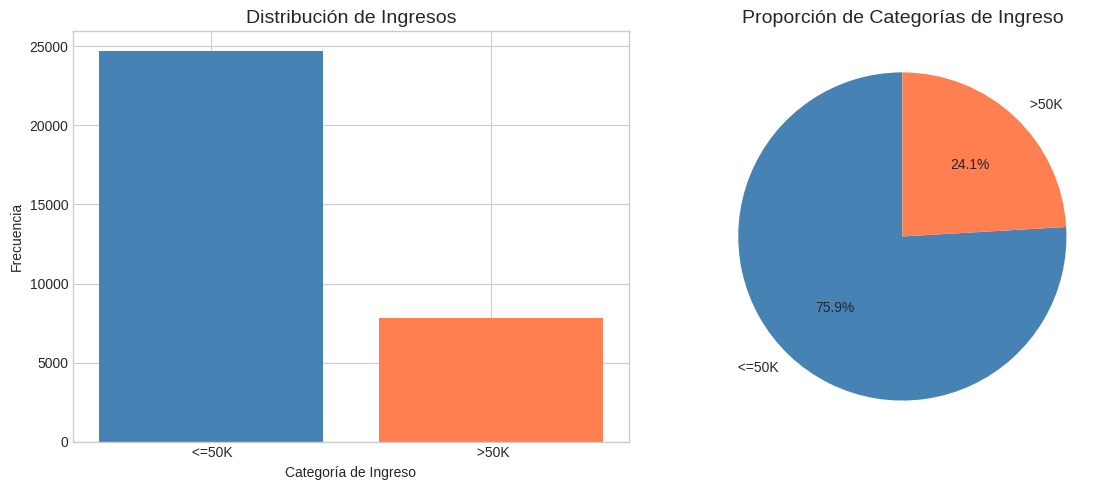


[ANÁLISIS]: El dataset presenta un desbalance de clases, con aproximadamente
el 75% de los registros en la categoría '<=50K' y el 25% en '>50K'.


In [ ]:
# Distribución de la variable objetivo
print("=" * 80)
print("DISTRIBUCIÓN DE LA VARIABLE OBJETIVO (income)")
print("=" * 80)

income_distribution = df_raw['income'].value_counts()
income_percentage = df_raw['income'].value_counts(normalize=True) * 100

print(f"\nConteo absoluto:")
print(income_distribution)
print(f"\nPorcentaje:")
print(income_percentage.round(2))

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de barras
axes[0].bar(income_distribution.index, income_distribution.values, color=['steelblue', 'coral'])
axes[0].set_title('Distribución de Ingresos', fontsize=14)
axes[0].set_xlabel('Categoría de Ingreso')
axes[0].set_ylabel('Frecuencia')

# Gráfico de pastel
axes[1].pie(income_percentage.values, labels=income_percentage.index, autopct='%1.1f%%',
            colors=['steelblue', 'coral'], startangle=90)
axes[1].set_title('Proporción de Categorías de Ingreso', fontsize=14)

plt.tight_layout()
plt.savefig('distribucion_variable_objetivo.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n[ANÁLISIS]: El dataset presenta un desbalance de clases, con aproximadamente")
print("el 75% de los registros en la categoría '<=50K' y el 25% en '>50K'.")



In [ ]:
income_distribution

,count
income,
<=50K,24720
>50K,7841


In [ ]:
income_percentage

,proportion
income,
<=50K,75.919044
>50K,24.080956


### 1.5 Selección de Variables Relevantes

In [ ]:
# Análisis de tipos de variables
print("=" * 80)
print("CLASIFICACIÓN DE VARIABLES")
print("=" * 80)

variables_numericas = df_raw.select_dtypes(include=[np.number]).columns.tolist() #['age', 'fnlwgt', 'education_num', ...]
variables_categoricas = df_raw.select_dtypes(include=['object']).columns.tolist()

print(f"\nVariables numéricas ({len(variables_numericas)}):")
for var in variables_numericas:
    print(f"  - {var}: rango [{df_raw[var].min()}, {df_raw[var].max()}]")

print(f"\nVariables categóricas ({len(variables_categoricas)}):")
for var in variables_categoricas:
    n_unique = df_raw[var].nunique()
    print(f"  - {var}: {n_unique} categorías únicas")

# Justificación de la selección
print("\n" + "=" * 80)
print("JUSTIFICACIÓN DE SELECCIÓN DE VARIABLES")
print("=" * 80)
print("""
Para este análisis, se considera:
- 'fnlwgt' (final weight): Variable técnica del censo, se excluirá del análisis predictivo.
- 'education' vs 'education_num': Son redundantes; 'education_num' codifica numéricamente
  el nivel educativo, por lo que se mantendrán ambas para comparación.
- 'income': Variable objetivo (target) para clasificación binaria.
""")

# Crear copia del dataset para procesamiento
df = df_raw.copy()
print(f"\nDataset copiado para procesamiento posterior: {df.shape}")


CLASIFICACIÓN DE VARIABLES

Variables numéricas (6):
  - age: rango [17, 90]
  - fnlwgt: rango [12285, 1484705]
  - education_num: rango [1, 16]
  - capital_gain: rango [0, 99999]
  - capital_loss: rango [0, 4356]
  - hours_per_week: rango [1, 99]

Variables categóricas (9):
  - workclass: 8 categorías únicas
  - education: 16 categorías únicas
  - marital_status: 7 categorías únicas
  - occupation: 14 categorías únicas
  - relationship: 6 categorías únicas
  - race: 5 categorías únicas
  - sex: 2 categorías únicas
  - native_country: 41 categorías únicas
  - income: 2 categorías únicas

JUSTIFICACIÓN DE SELECCIÓN DE VARIABLES

Para este análisis, se considera:
- 'fnlwgt' (final weight): Variable técnica del censo, se excluirá del análisis predictivo.
- 'education' vs 'education_num': Son redundantes; 'education_num' codifica numéricamente
  el nivel educativo, por lo que se mantendrán ambas para comparación.
- 'income': Variable objetivo (target) para clasificación binaria.


Dataset 

In [ ]:
variables_numericas

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [ ]:
variables_categoricas

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

<Axes: >

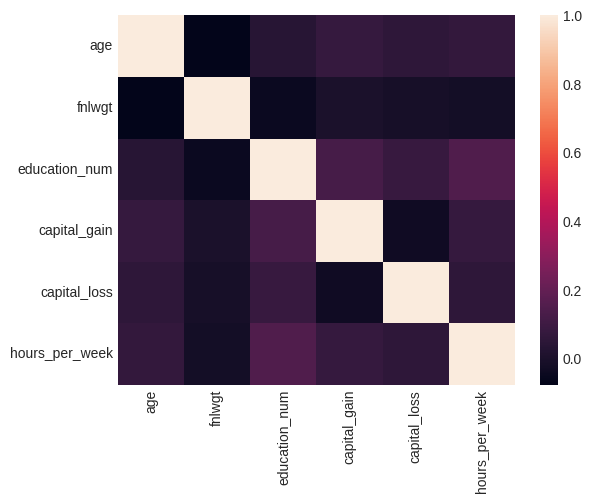

In [ ]:
# Correlación entre variables categóricas
import seaborn as sns
sns.heatmap(df[variables_numericas].corr())

In [ ]:
df[variables_categoricas[0]].value_counts()/len(df)*100

,count
workclass,
Private,69.703019
Self-emp-not-inc,7.803814
Local-gov,6.427935
?,5.638647
State-gov,3.986364
Self-emp-inc,3.427413
Federal-gov,2.948312
Without-pay,0.042996
Never-worked,0.021498


In [ ]:
df[variables_categoricas[0]].value_counts()

,count
workclass,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


In [ ]:
# Justificación de la selección

## Etapa 2: Preprocesamiento de Datos (Data Preprocessing)

El preprocesamiento es esencial para garantizar que el dataset sea preciso y confiable, corrigiendo errores, manejando valores faltantes, eliminando duplicados y abordando datos ruidosos. Esta etapa mejora la calidad de los datos antes de su transformación y análisis.

### 2.1 Análisis de Valores Faltantes

ANÁLISIS DE VALORES FALTANTES

Columnas con valores faltantes:
                Valores Faltantes  Porcentaje (%)
occupation                   1843            5.66
workclass                    1836            5.64
native_country                583            1.79


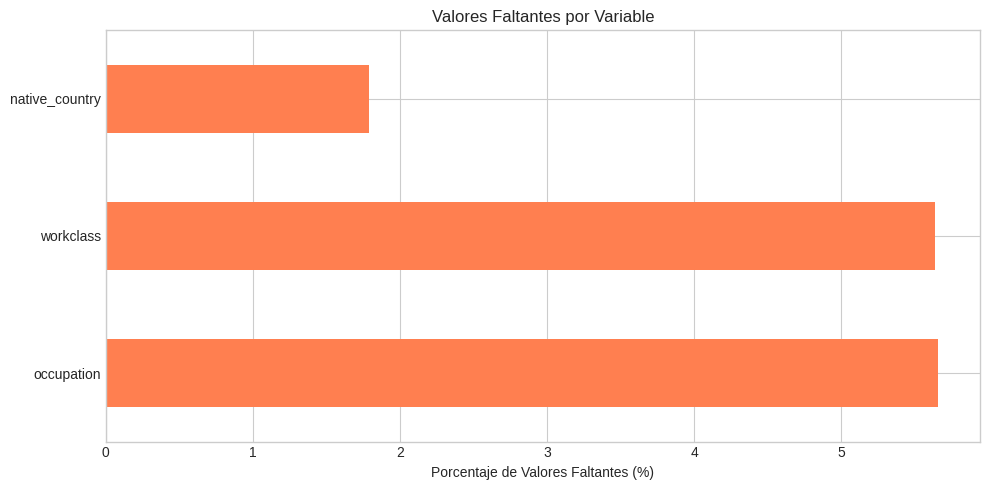


Total de filas con al menos un valor faltante: 2399 (7.37%)


In [ ]:
print("=" * 80)
print("ANÁLISIS DE VALORES FALTANTES")
print("=" * 80)

# Conteo de valores faltantes por columna
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Valores Faltantes': missing_values,
    'Porcentaje (%)': missing_percentage.round(2)
})

missing_df = missing_df[missing_df['Valores Faltantes'] > 0].sort_values(
    by='Valores Faltantes', ascending=False
)

if len(missing_df) > 0:
    print("\nColumnas con valores faltantes:")
    print(missing_df)

    # Visualización de valores faltantes
    fig, ax = plt.subplots(figsize=(10, 5))
    missing_df['Porcentaje (%)'].plot(kind='barh', color='coral', ax=ax)
    ax.set_xlabel('Porcentaje de Valores Faltantes (%)')
    ax.set_title('Valores Faltantes por Variable')
    plt.tight_layout()
    plt.savefig('valores_faltantes.png', dpi=150, bbox_inches='tight')
    plt.show()
else:
    print("\nNo se encontraron valores faltantes en el dataset.")

# Total de filas con al menos un valor faltante
filas_con_missing = df.isnull().any(axis=1).sum()
print(f"\nTotal de filas con al menos un valor faltante: {filas_con_missing} ({(filas_con_missing/len(df)*100):.2f}%)")


### 2.2 Tratamiento de Valores Faltantes

In [ ]:
print("=" * 80)
print("TRATAMIENTO DE VALORES FALTANTES")
print("=" * 80)

# Estrategia: Imputación con la moda para variables categóricas
print("\nEstrategia de imputación:")
print("- Variables categóricas: Imputar con la moda (valor más frecuente)")

# Identificar columnas con valores faltantes
columns_with_missing = df.columns[df.isnull().any()].tolist()

for col in columns_with_missing:
    if df[col].dtype == 'object':
        mode_value = df[col].mode()[0]
        missing_count = df[col].isnull().sum()
        df[col].fillna(mode_value, inplace=True)
        print(f"  - '{col}': {missing_count} valores imputados con '{mode_value}'")
    else:
        # Para variables numéricas, usar la mediana (más robusta a outliers)
        median_value = df[col].median()
        missing_count = df[col].isnull().sum()
        df[col].fillna(median_value, inplace=True)
        print(f"  - '{col}': {missing_count} valores imputados con mediana = {median_value}")

# Verificación
print(f"\nVerificación post-imputación:")
print(f"Valores faltantes restantes: {df.isnull().sum().sum()}")

TRATAMIENTO DE VALORES FALTANTES

Estrategia de imputación:
- Variables categóricas: Imputar con la moda (valor más frecuente)
  - 'workclass': 1836 valores imputados con ' Private'
  - 'occupation': 1843 valores imputados con ' Prof-specialty'
  - 'native_country': 583 valores imputados con ' United-States'

Verificación post-imputación:
Valores faltantes restantes: 0


### 2.3 Identificación y Eliminación de Duplicados

In [ ]:
print("=" * 80)
print("IDENTIFICACIÓN Y ELIMINACIÓN DE DUPLICADOS")
print("=" * 80)

# Conteo de duplicados
duplicados = df.duplicated().sum()
print(f"\nRegistros duplicados encontrados: {duplicados} ({(duplicados/len(df)*100):.2f}%)")

# Mostrar ejemplos de duplicados si existen
if duplicados > 0:
    print("\nEjemplo de registros duplicados:")
    duplicated_rows = df[df.duplicated(keep=False)]
    print(duplicated_rows.head(10))

    # Eliminar duplicados
    df_antes = len(df)
    df = df.drop_duplicates()
    df_despues = len(df)

    print(f"\nRegistros antes de eliminar duplicados: {df_antes}")
    print(f"Registros después de eliminar duplicados: {df_despues}")
    print(f"Registros eliminados: {df_antes - df_despues}")
else:
    print("No se encontraron registros duplicados.")



IDENTIFICACIÓN Y ELIMINACIÓN DE DUPLICADOS

Registros duplicados encontrados: 24 (0.07%)

Ejemplo de registros duplicados:
      age workclass  fnlwgt      education  education_num  \
2303   90   Private   52386   Some-college             10   
3917   19   Private  251579   Some-college             10   
4325   25   Private  308144      Bachelors             13   
4767   21   Private  250051   Some-college             10   
4881   25   Private  308144      Bachelors             13   
4940   38   Private  207202        HS-grad              9   
5104   90   Private   52386   Some-college             10   
5579   27   Private  255582        HS-grad              9   
5805   20   Private  107658   Some-college             10   
5842   25   Private  195994        1st-4th              2   

           marital_status          occupation    relationship  \
2303        Never-married       Other-service   Not-in-family   
3917        Never-married       Other-service       Own-child   
4325      

In [ ]:
df['income'].value_counts()

,count
income,
<=50K,24698
>50K,7839


### 2.4 Detección y Tratamiento de Outliers

La detección de outliers utiliza el método del rango intercuartílico (IQR), donde los valores que caen fuera del rango
Q
1
−
1.5
×
I
Q
R
a
Q
3
+
1.5
×
I
Q
R
 se consideran atípicos.

DETECCIÓN Y TRATAMIENTO DE OUTLIERS

Análisis de outliers por variable numérica:
----------------------------------------------------------------------
      Variable   Q1   Q3  IQR  Límite Inferior  Límite Superior  N° Outliers  % Outliers
           age 28.0 48.0 20.0             -2.0             78.0          142        0.44
 education_num  9.0 12.0  3.0              4.5             16.5         1193        3.67
  capital_gain  0.0  0.0  0.0              0.0              0.0         2712        8.34
  capital_loss  0.0  0.0  0.0              0.0              0.0         1519        4.67
hours_per_week 40.0 45.0  5.0             32.5             52.5         9002       27.67


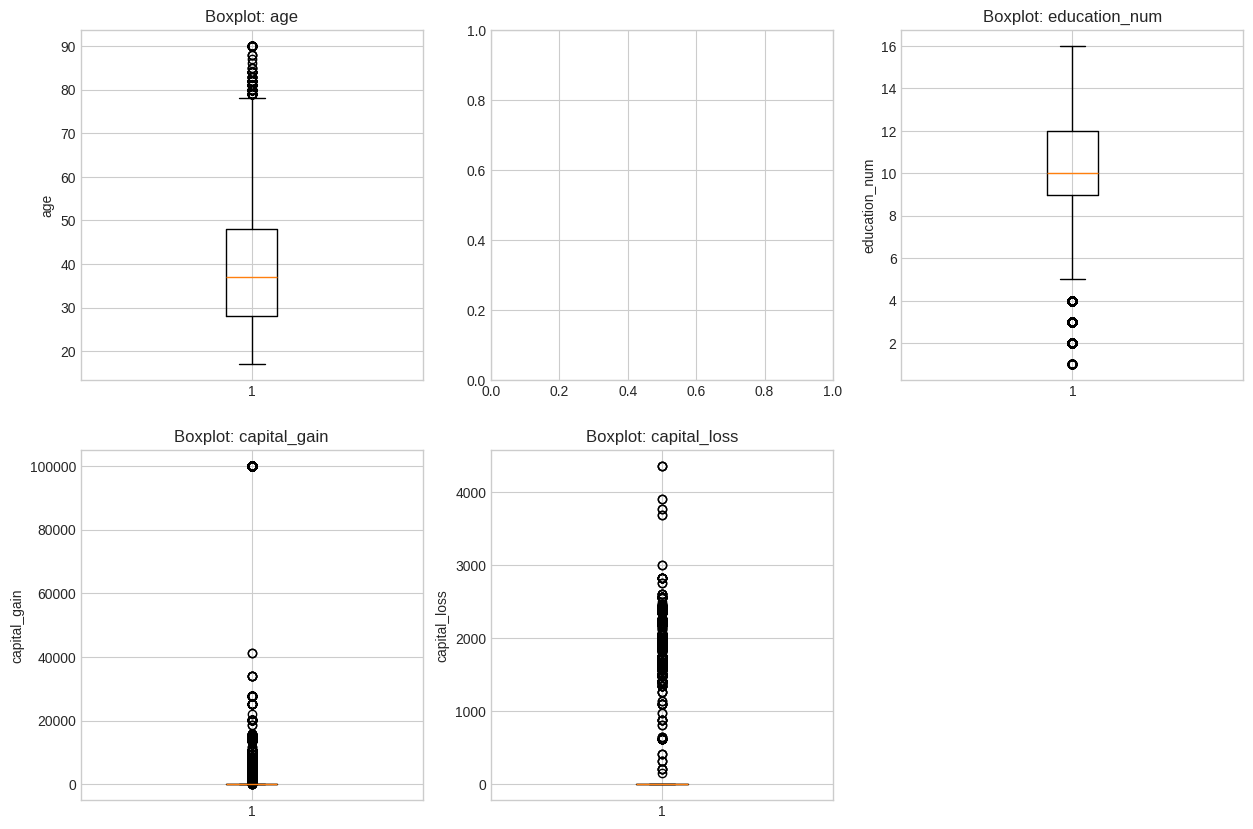

In [ ]:
print("=" * 80)
print("DETECCIÓN Y TRATAMIENTO DE OUTLIERS")
print("=" * 80)

def detectar_outliers_iqr(data, column):
    """
    Detecta outliers usando el método IQR.
    Retorna límites inferior y superior, y máscara de outliers.
    """
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers_mask = (data[column] < limite_inferior) | (data[column] > limite_superior)

    return limite_inferior, limite_superior, outliers_mask

# Aplicar detección de outliers a variables numéricas
print("\nAnálisis de outliers por variable numérica:")
print("-" * 70)

outliers_summary = []
for col in variables_numericas:
    if col != 'fnlwgt':  # Excluir variable técnica
        lim_inf, lim_sup, mask = detectar_outliers_iqr(df, col)
        n_outliers = mask.sum()
        pct_outliers = (n_outliers / len(df)) * 100

        outliers_summary.append({
            'Variable': col,
            'Q1': df[col].quantile(0.25),
            'Q3': df[col].quantile(0.75),
            'IQR': df[col].quantile(0.75) - df[col].quantile(0.25),
            'Límite Inferior': lim_inf,
            'Límite Superior': lim_sup,
            'N° Outliers': n_outliers,
            '% Outliers': round(pct_outliers, 2)
        })

outliers_df = pd.DataFrame(outliers_summary)
print(outliers_df.to_string(index=False))

# Visualización de boxplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(variables_numericas):
    if col != 'fnlwgt' and idx < 6:
        axes[idx].boxplot(df[col].dropna())
        axes[idx].set_title(f'Boxplot: {col}')
        axes[idx].set_ylabel(col)

# Eliminar subplot vacío si existe
if len(variables_numericas) < 7:
    for i in range(len(variables_numericas) - 1, 6):
        fig.delaxes(axes[i])

plt.show()



### 2.6 Limpieza de Datos Categóricos


In [ ]:
print("=" * 80)
print("LIMPIEZA DE DATOS CATEGÓRICOS")
print("=" * 80)

# Revisar categorías únicas y posibles inconsistencias
print("\nRevisión de categorías por variable:")
for col in variables_categoricas:
    print(f"\n{col}:")
    print(df[col].value_counts())

# Limpieza: eliminar espacios en blanco y estandarizar
print("\n" + "-" * 50)
print("Limpieza aplicada:")

for col in variables_categoricas:
    # Eliminar espacios en blanco al inicio y final
    if df[col].dtype == 'object':
        df[col] = df[col].str.strip()

# Estandarizar la variable objetivo
df['income'] = df['income'].replace({'<=50K': 0, '>50K': 1})
print("- Variable 'income' codificada: '<=50K' → 0, '>50K' → 1")

# Verificación
print(f"\nDistribución de income codificada:")
print(df['income'].value_counts())



LIMPIEZA DE DATOS CATEGÓRICOS

Revisión de categorías por variable:

workclass:
workclass
Private             24509
Self-emp-not-inc     2540
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

education:
education
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: count, dtype: int64

marital_status:
marital_status
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64



## Etapa 3: Transformación de Datos (Data Transformation)


La transformación de datos convierte los datos en un formato adecuado para el análisis y la minería. Incluye normalización, discretización, agregación y codificación de variables categóricas.

### 3.1 Codificación de Variables Categóricas


In [ ]:
print("=" * 80)
print("CODIFICACIÓN DE VARIABLES CATEGÓRICAS")
print("=" * 80)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Separar variables categóricas (excluyendo la variable objetivo ya codificada)
categorical_cols = [col for col in df.select_dtypes(include=['object']).columns]

print(f"\nVariables categóricas a codificar: {len(categorical_cols)}")
for col in categorical_cols:
    print(f"  - {col}: {df[col].nunique()} categorías")

# Estrategia de codificación:
# - One-Hot Encoding para variables con pocas categorías
# - Label Encoding para variables con muchas categorías

print("\n" + "-" * 50)
print("Aplicando One-Hot Encoding:")

# Crear copia para transformación
df_encoded = df.copy()

# One-Hot Encoding para variables con <= 6 categorías
cols_onehot = ['sex', 'relationship', 'race']

for col in cols_onehot:
    if col in df_encoded.columns:
        dummies = pd.get_dummies(df_encoded[col], prefix=col, drop_first=True)
        df_encoded = pd.concat([df_encoded, dummies], axis=1)
        df_encoded.drop(col, axis=1, inplace=True)
        print(f"  - {col}: {len(dummies.columns)} nuevas columnas creadas")

# Label Encoding para variables con > 6 categorías
print("\nAplicando Label Encoding:")
cols_label = ['workclass', 'education', 'marital_status', 'occupation', 'native_country']

label_encoders = {}
for col in cols_label:
    if col in df_encoded.columns:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
        label_encoders[col] = le
        print(f"  - {col}: codificado (clases: {len(le.classes_)})")

print(f"\nDimensiones después de codificación: {df_encoded.shape}")



CODIFICACIÓN DE VARIABLES CATEGÓRICAS

Variables categóricas a codificar: 8
  - workclass: 8 categorías
  - education: 16 categorías
  - marital_status: 7 categorías
  - occupation: 14 categorías
  - relationship: 6 categorías
  - race: 5 categorías
  - sex: 2 categorías
  - native_country: 41 categorías

--------------------------------------------------
Aplicando One-Hot Encoding:
  - sex: 1 nuevas columnas creadas
  - relationship: 5 nuevas columnas creadas
  - race: 4 nuevas columnas creadas

Aplicando Label Encoding:
  - workclass: codificado (clases: 8)
  - education: codificado (clases: 16)
  - marital_status: codificado (clases: 7)
  - occupation: codificado (clases: 14)
  - native_country: codificado (clases: 41)

Dimensiones después de codificación: (32537, 22)


In [ ]:
df_encoded.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,capital_gain,capital_loss,hours_per_week,native_country,income,sex_Male,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,6,77516,9,13,4,0,2174,0,40,38,0,True,True,False,False,False,False,False,False,False,True
1,50,5,83311,9,13,2,3,0,0,13,38,0,True,False,False,False,False,False,False,False,False,True
2,38,3,215646,11,9,0,5,0,0,40,38,0,True,True,False,False,False,False,False,False,False,True
3,53,3,234721,1,7,2,5,0,0,40,38,0,True,False,False,False,False,False,False,True,False,False
4,28,3,338409,9,13,2,9,0,0,40,4,0,False,False,False,False,False,True,False,True,False,False


In [ ]:
pd.Categorical(df_encoded['native_country']).dtype

CategoricalDtype(categories=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
                  15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
                  30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40],
, ordered=False, categories_dtype=int64)

### 3.2 Normalización y Estandarización


In [ ]:
print("=" * 80)
print("NORMALIZACIÓN Y ESTANDARIZACIÓN")
print("=" * 80)

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Identificar columnas numéricas para escalar
numeric_cols_to_scale = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

# Excluir fnlwgt y la variable objetivo
if 'fnlwgt' in df_encoded.columns:
    df_encoded.drop('fnlwgt', axis=1, inplace=True)

print("\nVariables numéricas a escalar:")
for col in numeric_cols_to_scale:
    if col in df_encoded.columns:
        print(f"  - {col}: [{df_encoded[col].min():.2f}, {df_encoded[col].max():.2f}]")

# Estandarización (Z-score): media=0, std=1
print("\n" + "-" * 50)
print("Aplicando StandardScaler (Z-score normalization):")

scaler = StandardScaler()
df_standardized = df_encoded.copy()

cols_to_scale = [col for col in numeric_cols_to_scale if col in df_standardized.columns]
df_standardized[cols_to_scale] = scaler.fit_transform(df_standardized[cols_to_scale])

print("\nEstadísticas después de estandarización:")
print(df_standardized[cols_to_scale].describe().round(4))

# Min-Max Scaling (alternativa): valores entre 0 y 1
print("\n" + "-" * 50)
print("Aplicando MinMaxScaler (normalización 0-1):")

minmax_scaler = MinMaxScaler()
df_normalized = df_encoded.copy()
df_normalized[cols_to_scale] = minmax_scaler.fit_transform(df_normalized[cols_to_scale])

print("\nEstadísticas después de normalización Min-Max:")
print(df_normalized[cols_to_scale].describe().round(4))

# Guardar versión estandarizada para el modelo
df_final = df_standardized.copy()
print(f"\nDataset final para modelado: {df_final.shape}")



NORMALIZACIÓN Y ESTANDARIZACIÓN

Variables numéricas a escalar:
  - age: [17.00, 90.00]
  - education_num: [1.00, 16.00]
  - capital_gain: [0.00, 99999.00]
  - capital_loss: [0.00, 4356.00]
  - hours_per_week: [1.00, 99.00]

--------------------------------------------------
Aplicando StandardScaler (Z-score normalization):

Estadísticas después de estandarización:
              age  education_num  capital_gain  capital_loss  hours_per_week
count  32537.0000     32537.0000    32537.0000    32537.0000      32537.0000
mean      -0.0000         0.0000        0.0000        0.0000         -0.0000
std        1.0000         1.0000        1.0000        1.0000          1.0000
min       -1.5828        -3.5316       -0.1460       -0.2167         -3.1944
25%       -0.7762        -0.4207       -0.1460       -0.2167         -0.0357
50%       -0.1163        -0.0318       -0.1460       -0.2167         -0.0357
75%        0.6903         0.7459       -0.1460       -0.2167          0.3693
max        3.770

### 3.3 Reducción de Dimensionalidad con PCA


El Análisis de Componentes Principales (PCA) es una técnica que proyecta los datos a un espacio de menor dimensión maximizando la varianza explicada.

REDUCCIÓN DE DIMENSIONALIDAD CON PCA

Dimensiones originales: 20 características
Componentes necesarios para explicar 95% de varianza: 7


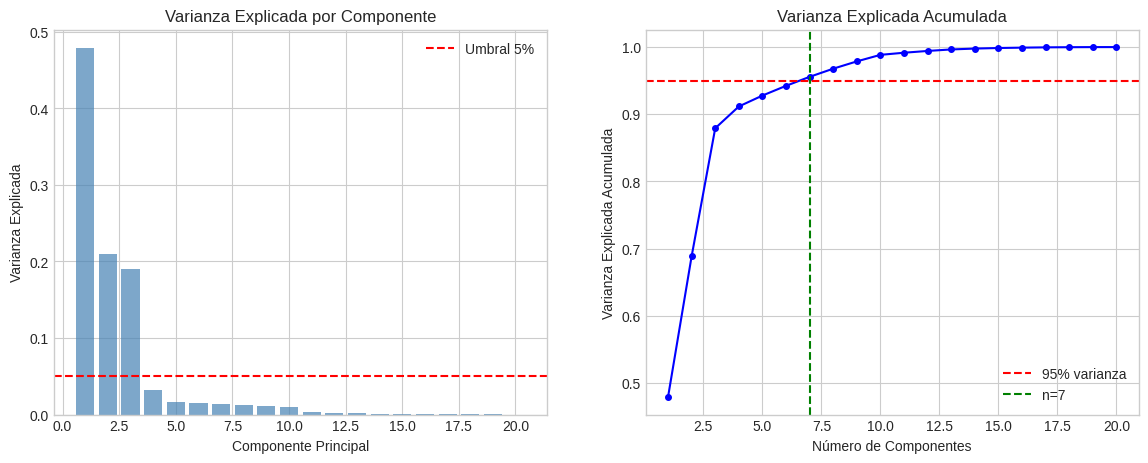


Dimensiones reducidas: 7 componentes principales
Varianza total explicada: 95.57%

Dataset con PCA: (32537, 8)
         PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   1.509900 -4.755190 -4.003044  1.082939  3.159563  0.020914  0.019921   
1   1.503137 -2.120875 -2.626957 -0.525493  1.471713 -1.220818 -0.052865   
2   1.647226 -1.306937 -0.049990 -2.291335 -0.575542 -0.899877 -0.184138   
3   0.793731  3.390109 -8.911537 -0.972520 -0.138746 -0.182056 -0.109932   
4 -32.403422  1.692937  2.634695 -0.599798 -0.232084  0.326941 -0.117580   

   income  
0       0  
1       0  
2       0  
3       0  
4       0  


In [ ]:
print("=" * 80)
print("REDUCCIÓN DE DIMENSIONALIDAD CON PCA")
print("=" * 80)

from sklearn.decomposition import PCA

# Preparar datos para PCA (solo variables numéricas escaladas)
X_for_pca = df_final.drop('income', axis=1)
y = df_final['income']

print(f"\nDimensiones originales: {X_for_pca.shape[1]} características")

# PCA con todos los componentes para análisis de varianza explicada
pca_full = PCA()
pca_full.fit(X_for_pca)

# Varianza explicada acumulada
varianza_explicada = pca_full.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada)

# Determinar número óptimo de componentes (95% de varianza)
n_components_95 = np.argmax(varianza_acumulada >= 0.95) + 1
print(f"Componentes necesarios para explicar 95% de varianza: {n_components_95}")

# Visualización de varianza explicada
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de varianza individual
axes[0].bar(range(1, len(varianza_explicada) + 1), varianza_explicada, alpha=0.7, color='steelblue')
axes[0].set_xlabel('Componente Principal')
axes[0].set_ylabel('Varianza Explicada')
axes[0].set_title('Varianza Explicada por Componente')
axes[0].axhline(y=0.05, color='red', linestyle='--', label='Umbral 5%')
axes[0].legend()

# Gráfico de varianza acumulada
axes[1].plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, 'b-o', markersize=4)
axes[1].axhline(y=0.95, color='red', linestyle='--', label='95% varianza')
axes[1].axvline(x=n_components_95, color='green', linestyle='--', label=f'n={n_components_95}')
axes[1].set_xlabel('Número de Componentes')
axes[1].set_ylabel('Varianza Explicada Acumulada')
axes[1].set_title('Varianza Explicada Acumulada')
axes[1].legend()

plt.show()

# Aplicar PCA con componentes óptimos
pca = PCA(n_components=n_components_95)
X_pca = pca.fit_transform(X_for_pca)

print(f"\nDimensiones reducidas: {X_pca.shape[1]} componentes principales")
print(f"Varianza total explicada: {varianza_acumulada[n_components_95-1]*100:.2f}%")

# Crear DataFrame con componentes principales
pca_columns = [f'PC{i+1}' for i in range(n_components_95)]
df_pca = pd.DataFrame(X_pca, columns=pca_columns)
df_pca['income'] = y.values

print(f"\nDataset con PCA: {df_pca.shape}")
print(df_pca.head())


### 3.4 Selección de Características con SelectKBest


La selección de características identifica las variables más relevantes para el modelo predictivo.

SELECCIÓN DE CARACTERÍSTICAS CON SELECTKBEST

Características totales: 20

--------------------------------------------------
Método: ANOVA F-test (f_classif)

Top 10 características por F-Score:
            Característica     F-Score       P-Value
             education_num 4120.313326  0.000000e+00
                       age 1885.316441  0.000000e+00
            hours_per_week 1811.533866  0.000000e+00
    relationship_Own-child 1793.852400  0.000000e+00
              capital_gain 1708.013854  0.000000e+00
                  sex_Male 1591.763761  0.000000e+00
            marital_status 1344.344761 1.973875e-288
relationship_Not-in-family 1195.987860 2.111692e-257
              capital_loss  754.012116 4.022159e-164
    relationship_Unmarried  678.694460 4.260281e-148

--------------------------------------------------
Método: Información Mutua

Top 10 características por Información Mutua:
        Característica  MI-Score
        marital_status  0.104256
          capital_gain  0.0824

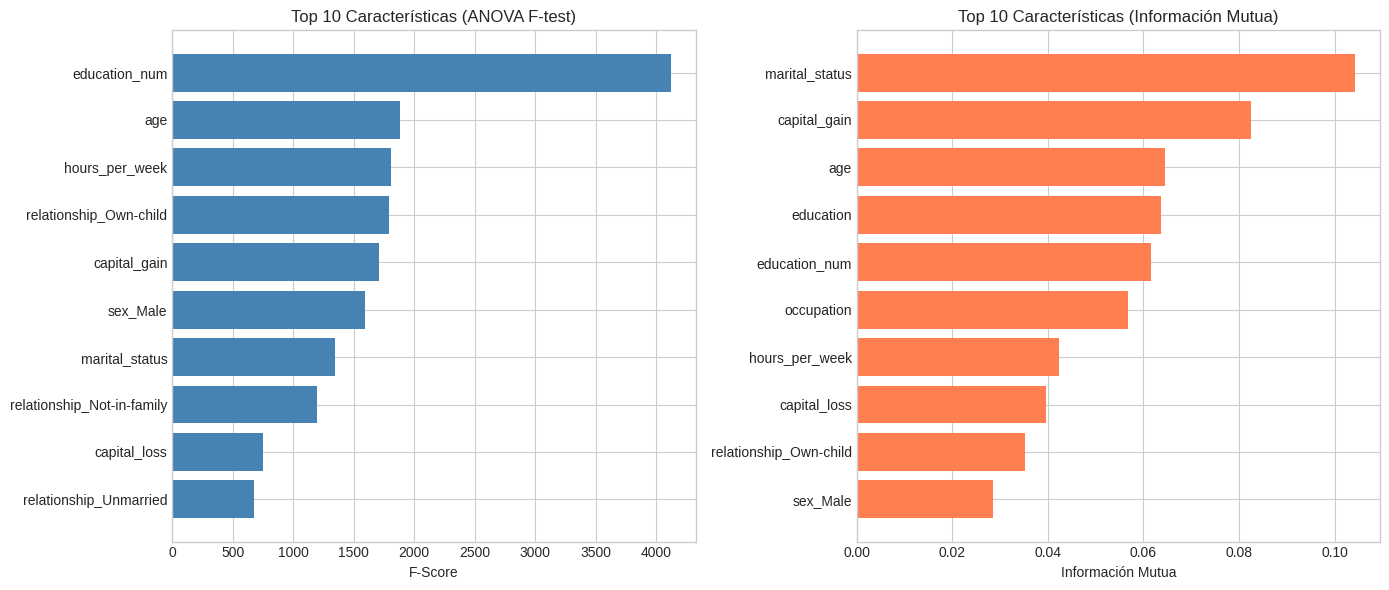


10 características seleccionadas: ['age', 'education_num', 'marital_status', 'capital_gain', 'capital_loss', 'hours_per_week', 'sex_Male', 'relationship_Not-in-family', 'relationship_Own-child', 'relationship_Unmarried']


In [ ]:
print("=" * 80)
print("SELECCIÓN DE CARACTERÍSTICAS CON SELECTKBEST")
print("=" * 80)

from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif

# Preparar datos
X = df_final.drop('income', axis=1)
y = df_final['income']

print(f"\nCaracterísticas totales: {X.shape[1]}")

# SelectKBest con f_classif (ANOVA F-test)
print("\n" + "-" * 50)
print("Método: ANOVA F-test (f_classif)")

selector_f = SelectKBest(score_func=f_classif, k='all')
selector_f.fit(X, y)

# Crear DataFrame con scores
scores_df = pd.DataFrame({
    'Característica': X.columns,
    'F-Score': selector_f.scores_,
    'P-Value': selector_f.pvalues_
}).sort_values('F-Score', ascending=False)

print("\nTop 10 características por F-Score:")
print(scores_df.head(10).to_string(index=False))

# SelectKBest con mutual_info_classif
print("\n" + "-" * 50)
print("Método: Información Mutua")

selector_mi = SelectKBest(score_func=mutual_info_classif, k='all')
selector_mi.fit(X, y)

mi_scores_df = pd.DataFrame({
    'Característica': X.columns,
    'MI-Score': selector_mi.scores_
}).sort_values('MI-Score', ascending=False)

print("\nTop 10 características por Información Mutua:")
print(mi_scores_df.head(10).to_string(index=False))

# Visualización comparativa
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# F-Score
top_10_f = scores_df.head(10)
axes[0].barh(range(len(top_10_f)), top_10_f['F-Score'].values, color='steelblue')
axes[0].set_yticks(range(len(top_10_f)))
axes[0].set_yticklabels(top_10_f['Característica'].values)
axes[0].set_xlabel('F-Score')
axes[0].set_title('Top 10 Características (ANOVA F-test)')
axes[0].invert_yaxis()

# Información Mutua
top_10_mi = mi_scores_df.head(10)
axes[1].barh(range(len(top_10_mi)), top_10_mi['MI-Score'].values, color='coral')
axes[1].set_yticks(range(len(top_10_mi)))
axes[1].set_yticklabels(top_10_mi['Característica'].values)
axes[1].set_xlabel('Información Mutua')
axes[1].set_title('Top 10 Características (Información Mutua)')
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig('feature_importance.png', dpi=150, bbox_inches='tight')
plt.show()

# Seleccionar las k mejores características
k_best = 10
selector_final = SelectKBest(score_func=f_classif, k=k_best)
X_selected = selector_final.fit_transform(X, y)

selected_features = X.columns[selector_final.get_support()].tolist()
print(f"\n{k_best} características seleccionadas: {selected_features}")



## Etapa 4: Minería de Datos (Data Mining)


La minería de datos es el núcleo del proceso KDD, donde se aplican algoritmos para descubrir patrones, tendencias y relaciones ocultas en los datos. Las técnicas principales incluyen clasificación, clustering y reglas de asociación.

### 4.1 División del Dataset


In [ ]:
print("=" * 80)
print("DIVISIÓN DEL DATASET EN ENTRENAMIENTO Y PRUEBA")
print("=" * 80)

from sklearn.model_selection import train_test_split

# Preparar datos finales
X = # TODO

y = # TODO


# División estratificada 70-30
X_train, X_test, y_train, y_test = # TODO


print(f"\nConjunto de entrenamiento: {X_train.shape[0]} muestras ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Conjunto de prueba: {X_test.shape[0]} muestras ({X_test.shape[0]/len(X)*100:.1f}%)")

print(f"\nDistribución de clases en entrenamiento:")
print(y_train.value_counts(normalize=True).round(4))

print(f"\nDistribución de clases en prueba:")
print(y_test.value_counts(normalize=True).round(4))


### 4.2 Modelo de Clasificación: Árbol de Decisión


In [ ]:
print("=" * 80)
print("MODELO DE CLASIFICACIÓN: ÁRBOL DE DECISIÓN")
print("=" * 80)

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Crear y entrenar el modelo
dt_classifier = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

dt_classifier.fit(X_train, y_train)

# Predicciones
y_pred_dt = dt_classifier.predict(X_test)

# Métricas
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(f"\nPrecisión del Árbol de Decisión: {accuracy_dt*100:.2f}%")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_dt, target_names=['<=50K', '>50K']))

# Matriz de confusión
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("\nMatriz de Confusión:")
print(cm_dt)

# Visualización del árbol
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier,
          feature_names=X.columns,
          class_names=['<=50K', '>50K'],
          filled=True,
          rounded=True,
          fontsize=8,
          max_depth=3)
plt.title('Árbol de Decisión (primeros 3 niveles)')
plt.tight_layout()
plt.savefig('arbol_decision.png', dpi=150, bbox_inches='tight')
plt.show()


### 4.3 Modelo de Clasificación: Random Forest


Random Forest combina múltiples árboles de decisión, donde cada árbol vota por una predicción y la clase más votada es la predicción final.

In [ ]:
print("=" * 80)
print("MODELO DE CLASIFICACIÓN: RANDOM FOREST")
print("=" * 80)

from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar el modelo
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

rf_classifier.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf_classifier.predict(X_test)

# Métricas
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"\nPrecisión del Random Forest: {accuracy_rf*100:.2f}%")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf, target_names=['<=50K', '>50K']))

# Matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nMatriz de Confusión:")
print(cm_rf)

# Importancia de características
feature_importance = pd.DataFrame({
    'Característica': X.columns,
    'Importancia': rf_classifier.feature_importances_
}).sort_values('Importancia', ascending=False)

print("\nTop 10 características más importantes:")
print(feature_importance.head(10).to_string(index=False))

# Visualización de importancia
plt.figure(figsize=(12, 6))
top_15 = feature_importance.head(15)
plt.barh(range(len(top_15)), top_15['Importancia'].values, color='forestgreen')
plt.yticks(range(len(top_15)), top_15['Característica'].values)
plt.xlabel('Importancia')
plt.title('Top 15 Características Más Importantes (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('feature_importance_rf.png', dpi=150, bbox_inches='tight')
plt.show()


### 4.4 Clustering con K-Means


El clustering K-Means agrupa observaciones similares en k clusters basándose en la distancia a los centroides.

In [ ]:
print("=" * 80)
print("CLUSTERING: K-MEANS")
print("=" * 80)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Usar datos normalizados para clustering
X_clustering = df_normalized.drop('income', axis=1)

# Método del codo para determinar número óptimo de clusters
print("\nDeterminando número óptimo de clusters...")

inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_clustering)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_clustering, kmeans.labels_))
    print(f"  k={k}: Inercia={kmeans.inertia_:.2f}, Silhouette={silhouette_scores[-1]:.4f}")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Método del codo
axes[0].plot(K_range, inertias, 'b-o', markersize=8)
axes[0].set_xlabel('Número de Clusters (k)')
axes[0].set_ylabel('Inercia')
axes[0].set_title('Método del Codo')
axes[0].grid(True)

# Silhouette Score
axes[1].plot(K_range, silhouette_scores, 'g-o', markersize=8)
axes[1].set_xlabel('Número de Clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score por Número de Clusters')
axes[1].grid(True)

plt.tight_layout()
plt.savefig('kmeans_optimization.png', dpi=150, bbox_inches='tight')
plt.show()

# Aplicar K-Means con k óptimo
k_optimal = 4  # Basado en análisis visual
print(f"\nAplicando K-Means con k={k_optimal}")

kmeans_final = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_clustering)

# Agregar clusters al dataset
df_clustered = df_normalized.copy()
df_clustered['Cluster'] = clusters

# Análisis de clusters
print("\nDistribución de clusters:")
print(df_clustered['Cluster'].value_counts().sort_index())

# Características de cada cluster
print("\nCaracterísticas promedio por cluster:")
cluster_means = df_clustered.groupby('Cluster').mean()
print(cluster_means.round(3))


### 4.5 Reglas de Asociación con Apriori


El algoritmo Apriori identifica patrones frecuentes y genera reglas de asociación del tipo "si X entonces Y".

In [ ]:
print("=" * 80)
print("REGLAS DE ASOCIACIÓN: ALGORITMO APRIORI")
print("=" * 80)

# Nota: Este ejemplo usa datos discretizados para demostrar el concepto
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Discretizar variables numéricas para reglas de asociación
df_assoc = df_raw.copy()
df_assoc = df_assoc.dropna()

# Discretización de edad
df_assoc['age_group'] = pd.cut(df_assoc['age'],
                               bins=[0, 25, 35, 50, 65, 100],
                               labels=['Joven', 'Adulto_Joven', 'Adulto', 'Maduro', 'Senior'])

# Discretización de horas de trabajo
df_assoc['hours_group'] = pd.cut(df_assoc['hours_per_week'],
                                  bins=[0, 35, 45, 60, 100],
                                  labels=['Parcial', 'Normal', 'Extra', 'Intensivo'])

# Seleccionar columnas para análisis
cols_for_assoc = ['age_group', 'education', 'marital_status', 'occupation',
                  'hours_group', 'income']

# Crear transacciones
transactions = df_assoc[cols_for_assoc].astype(str).values.tolist()

# Crear lista de items únicos por transacción
transactions_clean = []
for t in transactions:
    transaction = []
    for i, col in enumerate(cols_for_assoc):
        transaction.append(f"{col}={t[i]}")
    transactions_clean.append(transaction)

# Codificar transacciones
te = TransactionEncoder()
te_ary = te.fit(transactions_clean).transform(transactions_clean)
df_te = pd.DataFrame(te_ary, columns=te.columns_)

print(f"\nDimensiones del dataset de transacciones: {df_te.shape}")
print(f"Número de items únicos: {len(te.columns_)}")

# Encontrar itemsets frecuentes
print("\nBuscando itemsets frecuentes...")
frequent_itemsets = apriori(df_te, min_support=0.05, use_colnames=True)
print(f"Itemsets frecuentes encontrados: {len(frequent_itemsets)}")

# Generar reglas de asociación
print("\nGenerando reglas de asociación...")
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
rules = rules.sort_values('lift', ascending=False)

print(f"Reglas de asociación generadas: {len(rules)}")

# Mostrar top 10 reglas
print("\nTop 10 Reglas de Asociación (ordenadas por lift):")
print("-" * 100)

top_rules = rules.head(10)[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
for idx, row in top_rules.iterrows():
    antecedent = ', '.join(list(row['antecedents']))
    consequent = ', '.join(list(row['consequents']))
    print(f"SI {antecedent}")
    print(f"ENTONCES {consequent}")
    print(f"  Support: {row['support']:.4f}, Confidence: {row['confidence']:.4f}, Lift: {row['lift']:.4f}")
    print("-" * 100)


### Etapa 5: Evaluación e Interpretación de Resultados


La evaluación de patrones determina la relevancia y utilidad de los patrones descubiertos, utilizando métricas y visualizaciones para interpretar los hallazgos.

### 5.1 Comparación de Modelos de Clasificación


In [ ]:
print("=" * 80)
print("EVALUACIÓN: COMPARACIÓN DE MODELOS")
print("=" * 80)

from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve)

# Calcular métricas para ambos modelos
def calcular_metricas(y_true, y_pred, model_name):
    """Calcula y retorna diccionario con métricas de evaluación."""
    return {
        'Modelo': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred)
    }

# Métricas de modelos
# TODO


# Crear DataFrame comparativo
# TODO


# Visualización comparativa
# TODO


# Gráfico de barras comparativo
# TODO


# Matrices de confusión
from sklearn.metrics import ConfusionMatrixDisplay

# TODO



### 5.2 Curva ROC y AUC


In [ ]:
print("=" * 80)
print("CURVA ROC Y ÁREA BAJO LA CURVA (AUC)")
print("=" * 80)

# Obtener probabilidades
y_prob_dt = dt_classifier.predict_proba(X_test)[:, 1]
y_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]

# Calcular AUC
auc_dt = roc_auc_score(y_test, y_prob_dt)
auc_rf = roc_auc_score(y_test, y_prob_rf)

print(f"\nÁrea Bajo la Curva (AUC):")
print(f"  - Árbol de Decisión: {auc_dt:.4f}")
print(f"  - Random Forest: {auc_rf:.4f}")

# Calcular curvas ROC
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

# Visualización
plt.figure(figsize=(10, 8))
plt.plot(fpr_dt, tpr_dt, 'b-', linewidth=2, label=f'Árbol de Decisión (AUC = {auc_dt:.4f})')
plt.plot(fpr_rf, tpr_rf, 'g-', linewidth=2, label=f'Random Forest (AUC = {auc_rf:.4f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Clasificador Aleatorio')

plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=12)
plt.title('Curvas ROC - Comparación de Modelos', fontsize=14)
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('curvas_roc.png', dpi=150, bbox_inches='tight')
plt.show()


### 5.3 Validación Cruzada


In [ ]:
print("=" * 80)
print("VALIDACIÓN CRUZADA")
print("=" * 80)

from sklearn.model_selection import cross_val_score, StratifiedKFold

# Configurar validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("\nValidación Cruzada (5-fold):")
print("-" * 50)

# Árbol de Decisión
cv_scores_dt = cross_val_score(dt_classifier, X, y, cv=cv, scoring='accuracy')
print(f"\nÁrbol de Decisión:")
print(f"  Scores por fold: {cv_scores_dt.round(4)}")
print(f"  Media: {cv_scores_dt.mean():.4f} (+/- {cv_scores_dt.std()*2:.4f})")

# Random Forest
cv_scores_rf = cross_val_score(rf_classifier, X, y, cv=cv, scoring='accuracy')
print(f"\nRandom Forest:")
print(f"  Scores por fold: {cv_scores_rf.round(4)}")
print(f"  Media: {cv_scores_rf.mean():.4f} (+/- {cv_scores_rf.std()*2:.4f})")

# Visualización
fig, ax = plt.subplots(figsize=(10, 6))

positions = [1, 2]
bp = ax.boxplot([cv_scores_dt, cv_scores_rf], positions=positions, widths=0.5, patch_artist=True)

colors = ['steelblue', 'forestgreen']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_xticklabels(['Árbol de Decisión', 'Random Forest'])
ax.set_ylabel('Accuracy')
ax.set_title('Distribución de Accuracy en Validación Cruzada (5-fold)')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('validacion_cruzada.png', dpi=150, bbox_inches='tight')
plt.show()


### 5.4 Interpretación y Visualización de Resultados


In [ ]:
print("=" * 80)
print("INTERPRETACIÓN DE RESULTADOS")
print("=" * 80)

# Análisis de correlaciones con la variable objetivo
print("\nCorrelación de características con la variable objetivo:")

# TODO


# Heatmap de correlaciones
# TODO


# Distribución de características por clase
# TODO


# Age por income
# TODO


# Gráfico de barras para ocupación
# TODO



### 5.5 Resumen de Conocimiento Descubierto


In [ ]:
print("=" * 80)
print("RESUMEN DEL CONOCIMIENTO DESCUBIERTO")
print("=" * 80)

print("""
╔══════════════════════════════════════════════════════════════════════════════╗
║                    HALLAZGOS PRINCIPALES DEL ANÁLISIS KDD                     ║
╠══════════════════════════════════════════════════════════════════════════════╣
║                                                                              ║
║  1. SELECCIÓN DE DATOS:                                                      ║
║ # TODO                                                                       ║
║                                                                              ║
║  2. PREPROCESAMIENTO:                                                        ║
║ # TODO
║                                                                              ║
║  3. TRANSFORMACIÓN:                                                          ║
║ # TODO
║                                                                              ║
║  4. MINERÍA DE DATOS:                                                        ║
║ # TODO
║                                                                              ║
║  5. CONOCIMIENTO ACCIONABLE:                                                 ║
║ # TODO
║
║                                                                              ║
╚══════════════════════════════════════════════════════════════════════════════╝
""")

# Guardar resultados finales
# TODO



## Ejercicios propuestos para ampliar y mejorar los resultados obtenidos


- **Ejercicio 1**: Experimentación con Parámetros
Modifica los hiperparámetros del Random Forest (n_estimators, max_depth, min_samples_split) y documenta cómo afectan las métricas de evaluación.

- **Ejercicio 2**: Nuevas Técnicas de Imputación
Implementa estrategias alternativas para el tratamiento de valores faltantes (por ejemplo, imputación por k-NN o por modelo predictivo) y compara los resultados.

- **Ejercicio 3**: Otros Algoritmos de Clasificación
Entrena modelos adicionales como Support Vector Machine (SVM), Regresión Logística o Gradient Boosting, y compara su rendimiento con los modelos implementados.

- **Ejercicio 4**: Análisis de Clustering Avanzado
Aplica otros algoritmos de clustering (DBSCAN, Clustering Jerárquico) y compara los resultados con K-Means utilizando métricas como el Silhouette Score.

- **Ejercicio 5**: Interpretación de Reglas
Analiza las reglas de asociación generadas e identifica al menos 5 patrones de comportamiento que podrían ser útiles para la toma de decisiones empresariales.